In [5]:
import statistics
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd 

path ='/content/drive/MyDrive/CVS/data_panen.csv' 
df = pd.read_csv(path) 

df.describe() 

,tahun,luas_panen,produksi
count,26.0,26.000000,26.000000
mean,2011.0,185.076923,385.269231
std,0.0,200.329713,386.103256
min,2011.0,1.000000,1.000000
25%,2011.0,19.000000,44.000000
50%,2011.0,126.500000,218.000000
75%,2011.0,261.250000,729.250000
max,2011.0,721.000000,1080.000000


In [4]:
df

,tahun,nama_kabkota,jenis_tanaman,luas_panen,produksi
0,2011,Jakarta Utara,Temuireng,1,1
1,2011,Jakarta Pusat,Kunyit,1,3
2,2011,Jakarta Pusat,Lengkuas,2,4
3,2011,Jakarta Pusat,Jahe,1,11
4,2011,Jakarta Utara,Kencur,16,27
5,2011,Jakarta Utara,Kejibeling,15,27
6,2011,Jakarta Pusat,Temuireng,70,43
7,2011,Jakarta Barat,Lempuyang,28,47
8,2011,Jakarta Pusat,Temulawak,129,83
9,2011,Jakarta Pusat,Kejibeling,1,65


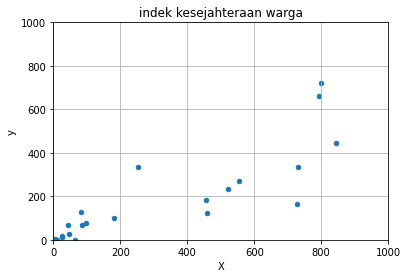

In [5]:
import matplotlib.pyplot as plt 

df.plot(kind='scatter', x='produksi', y='luas_panen') 

plt.title('indek kesejahteraan warga')
plt.xlabel('X')
plt.ylabel('y')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.grid(True)
plt.show()

In [6]:
import numpy as np
x = np.array(df['produksi'])
y = np.array(df['luas_panen'])

print(f'x : {x}')
print(f'y : {y}')

x : [   1    3    4   11   27   27   43   47   83   65   98   86  459  254
  457  523  182  727  730  799  844  793  554 1052 1068 1080]
y : [  1   1   2   1  16  15  70  28 129   1  76  68 124 334 184 235 102 164
 333 721 447 662 270 216 180 432]


In [7]:
x = x.reshape(-1, 1)
x.shape

(26, 1)

In [8]:
x

array([[   1],
       [   3],
       [   4],
       [  11],
       [  27],
       [  27],
       [  43],
       [  47],
       [  83],
       [  65],
       [  98],
       [  86],
       [ 459],
       [ 254],
       [ 457],
       [ 523],
       [ 182],
       [ 727],
       [ 730],
       [ 799],
       [ 844],
       [ 793],
       [ 554],
       [1052],
       [1068],
       [1080]])

In [9]:
# training model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y) 

LinearRegression()

In [10]:
x_vis = np.array([0, 10000]).reshape(-1, 1)
y_vis = model.predict(x_vis)

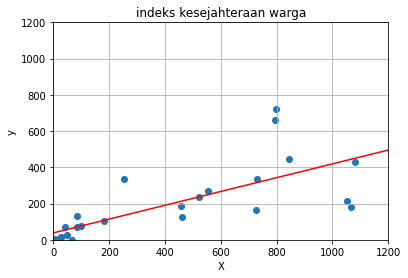

In [11]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, '-r')
plt.title('indeks kesejahteraan warga')
plt.xlabel('X')
plt.ylabel('y')
plt.xlim(0, 1200)
plt.ylim(0, 1200)
plt.grid(True)
plt.show()

In [12]:
print(f'intercept : {model.intercept_}')
print(f'slope : {model.coef_}')

intercept : 38.39849154205271
slope : [0.3807167]


In [13]:
produksi = np.array([145, 734, 320, 160]).reshape(-1, 1)
produksi

array([[145],
       [734],
       [320],
       [160]])

In [14]:
prediksi_indeks = model.predict(produksi)
prediksi_indeks

array([ 93.60241356, 317.84455198, 160.22783669,  99.31316412])

In [15]:
for penduduk, index in zip(produksi, prediksi_indeks):
  print(f'luas panen: {penduduk} produksi : {index}')

luas panen: [145] produksi : 93.60241356326279
luas panen: [734] produksi : 317.84455198045396
luas panen: [320] produksi : 160.2278366923094
luas panen: [160] produksi : 99.31316411718106


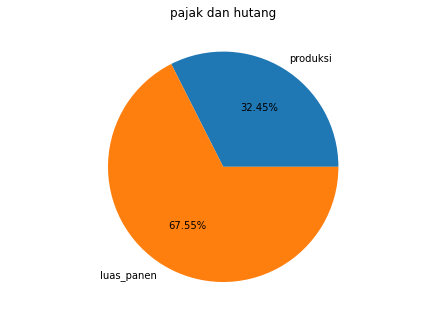

In [6]:
# PIECART
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.title("pajak dan hutang")
indeks = ['produksi','luas_panen']
jumlah = [4812, 10017]
ax.pie(jumlah,labels=indeks,autopct='%1.2f%%')
plt.show()
print()


In [20]:
df['luas_panen'].sum()

4812

In [23]:
df['produksi'].sum()

10017

<function matplotlib.pyplot.show(*args, **kw)>

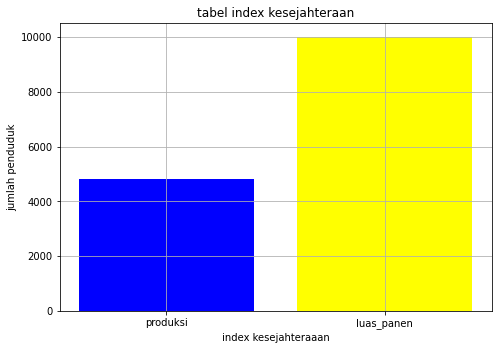

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
indeks = ['produksi','luas_panen']
jumlah = [4812, 10017]
c = ['blue', 'yellow', 'green','red','gray']
plt.title("tabel index kesejahteraan")
plt.xlabel("index kesejahteraaan")
plt.ylabel("jumlah penduduk")
plt.bar(indeks, jumlah, color = c)
plt.grid(True)
plt.show 